In [91]:
import disaggregate
from __future__ import print_function, division
import itertools
from copy import deepcopy
from collections import OrderedDict
from warnings import warn
from datetime import datetime
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from six import iteritems
from builtins import range
from disaggregate import fhmm_exact
%matplotlib inline

def convert_to_datetime(x):
    return datetime.fromtimestamp(x)

def resample_data(df,resample_freq):
    avg_df = df.resample(resample_freq).mean()
    return avg_df

In [92]:
app_list=['refrigerator', 'guest_ac', 'guest_lightfans', 'living_ac', 'conf_lights', 'conferenceroom_AC']

In [93]:
total_power=OrderedDict()
for name in app_list:
    filename=name + '.csv'
    dataset = pd.read_csv(filename,names = ['unix_date','meter_reading'])
    dataset['date'] = dataset['unix_date'].apply(convert_to_datetime)
    dataset = dataset.set_index('date').drop('unix_date', axis = 1)
    dataset['time'] = dataset.index.time
    total_power[name]=dataset['meter_reading']*1000

In [94]:
total_power

OrderedDict([('refrigerator', date
              2018-07-04 00:00:00    116.0
              2018-07-04 00:02:00    116.0
              2018-07-04 00:04:00    116.0
              2018-07-04 00:06:00    116.0
              2018-07-04 00:08:00      0.0
              2018-07-04 00:10:00      0.0
              2018-07-04 00:12:00      0.0
              2018-07-04 00:14:00      0.0
              2018-07-04 00:16:00      0.0
              2018-07-04 00:18:00      0.0
              2018-07-04 00:20:00      0.0
              2018-07-04 00:22:00      0.0
              2018-07-04 00:24:00      0.0
              2018-07-04 00:26:00    116.0
              2018-07-04 00:28:00    116.0
              2018-07-04 00:30:00    116.0
              2018-07-04 00:32:00    116.0
              2018-07-04 00:34:00    116.0
              2018-07-04 00:36:00      0.0
              2018-07-04 00:38:00      0.0
              2018-07-04 00:40:00      0.0
              2018-07-04 00:42:00      0.0
              2018-

In [95]:
fhmm = fhmm_exact.FHMM()

In [96]:
fhmm.train(total_power)

Identifying number of hidden states for appliance refrigerator
Number of hidden states for appliance refrigerator: 3
Training model for appliance refrigerator with 3 hidden states
[  0.00000000e+00   9.99999986e-01   1.37404119e-08]
[[  8.75113396e-01   1.24886532e-01   7.22413203e-08]
 [  1.82525572e-01   7.01290091e-01   1.16184337e-01]
 [  4.76355777e-01   2.01417199e-06   5.23642209e-01]]
[[   0.        ]
 [ 116.        ]
 [ 113.62453074]]
[[[  3.02297461e-06]]

 [[  7.21510805e-06]]

 [[  3.83116710e-01]]]
Identifying number of hidden states for appliance guest_ac
Number of hidden states for appliance guest_ac: 3
Training model for appliance guest_ac with 3 hidden states
[ 0.  0.  1.]
[[  9.94188646e-01   5.36432722e-03   4.47027268e-04]
 [  5.31144375e-03   9.93239981e-01   1.44857557e-03]
 [  2.73597811e-03   4.10396717e-03   9.93160055e-01]]
[[    0.]
 [  800.]
 [ 1700.]]
[[[  4.47027269e-06]]

 [[  4.82625483e-06]]

 [[  1.36798906e-05]]]
Identifying number of hidden states fo

In [97]:
testset = pd.read_csv('testingfile.csv')
testset.columns=['unix_date', 'refrigerator', 'guest_ac', 'guest_lightfans', 'microwave', 'living_ac', 'conf_lights', 'conferenceroom_AC', 'control_room']

testset

,unix_date,refrigerator,guest_ac,guest_lightfans,microwave,living_ac,conf_lights,conferenceroom_AC,control_room
0,1531247400,0.116,0.8,0.00,0.0,0.0,0.0,0.0,0.18
1,1531247520,0.116,0.8,0.00,0.0,0.0,0.0,0.0,0.18
2,1531247640,0.116,0.8,0.00,0.0,0.0,0.0,0.0,0.18
3,1531247760,0.000,0.8,0.00,0.0,0.0,0.0,0.0,0.18
4,1531247880,0.000,0.8,0.00,0.0,0.0,0.0,0.0,0.18
5,1531248000,0.000,0.8,0.00,0.0,0.0,0.0,0.0,0.18
6,1531248120,0.000,0.8,0.00,0.0,0.0,0.0,0.0,0.18
7,1531248240,0.000,0.8,0.00,0.0,0.0,0.0,0.0,0.18
8,1531248360,0.000,0.8,0.00,0.0,0.0,0.0,0.0,0.18
9,1531248480,0.000,0.8,0.00,0.0,0.0,0.0,0.0,0.18


In [99]:
testset*1000

,unix_date,refrigerator,guest_ac,guest_lightfans,microwave,living_ac,conf_lights,conferenceroom_AC,control_room
0,1531247400000,116.0,800.0,0.0,0.0,0.0,0.0,0.0,180.0
1,1531247520000,116.0,800.0,0.0,0.0,0.0,0.0,0.0,180.0
2,1531247640000,116.0,800.0,0.0,0.0,0.0,0.0,0.0,180.0
3,1531247760000,0.0,800.0,0.0,0.0,0.0,0.0,0.0,180.0
4,1531247880000,0.0,800.0,0.0,0.0,0.0,0.0,0.0,180.0
5,1531248000000,0.0,800.0,0.0,0.0,0.0,0.0,0.0,180.0
6,1531248120000,0.0,800.0,0.0,0.0,0.0,0.0,0.0,180.0
7,1531248240000,0.0,800.0,0.0,0.0,0.0,0.0,0.0,180.0
8,1531248360000,0.0,800.0,0.0,0.0,0.0,0.0,0.0,180.0
9,1531248480000,0.0,800.0,0.0,0.0,0.0,0.0,0.0,180.0


In [100]:
power_total=np.zeros((1439,1))
for name in app_list:
    print(name)
    testset[name]=testset[name]*1000
    power_total=power_total+testset[name].reshape(-1,1)

refrigerator
guest_ac
guest_lightfans
living_ac
conf_lights
conferenceroom_AC


/home/aman/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [101]:
power_total

array([[  916.],
       [  916.],
       [  916.],
       ..., 
       [ 1976.],
       [ 1976.],
       [ 1976.]])

In [102]:
df=pd.DataFrame(power_total)

In [103]:
result=fhmm.disaggregate_chunk(df)

In [104]:
result['time']=testset.index.values
result=result.set_index('time')
result

,conf_lights,conferenceroom_AC,guest_ac,guest_lightfans,living_ac,refrigerator
time,,,,,,
0,0.0,0.0,1700.0,0.0,0.0,114.0
1,0.0,0.0,800.0,0.0,0.0,114.0
2,0.0,0.0,800.0,0.0,0.0,114.0
3,0.0,0.0,800.0,0.0,0.0,0.0
4,0.0,0.0,800.0,0.0,0.0,0.0
5,0.0,0.0,800.0,0.0,0.0,0.0
6,0.0,0.0,800.0,0.0,0.0,0.0
7,0.0,0.0,800.0,0.0,0.0,0.0
8,0.0,0.0,800.0,0.0,0.0,0.0


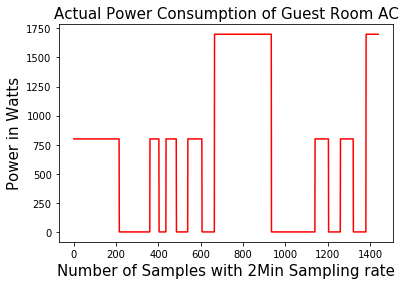

In [105]:
plt.plot(testset['guest_ac'], 'r', label="Predicted")
plt.ylabel('Power in Watts', fontsize=15)
plt.xlabel('Number of Samples with 2Min Sampling rate', fontsize=15)
plt.title('Actual Power Consumption of Guest Room AC', fontsize=15)
plt.show()

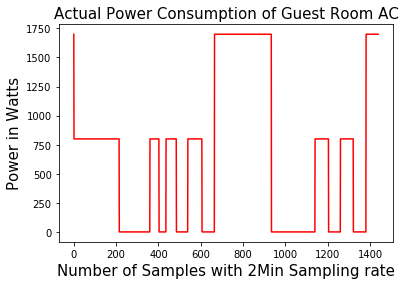

In [106]:
plt.plot(result['guest_ac'], 'r', label="Predicted")
plt.ylabel('Power in Watts', fontsize=15)
plt.xlabel('Number of Samples with 2Min Sampling rate', fontsize=15)
plt.title('Actual Power Consumption of Guest Room AC', fontsize=15)
plt.show()

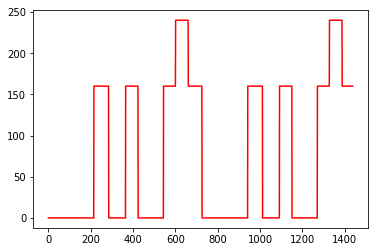

In [108]:
plt.plot(testset['guest_lightfans'], 'r', label="Predicted")

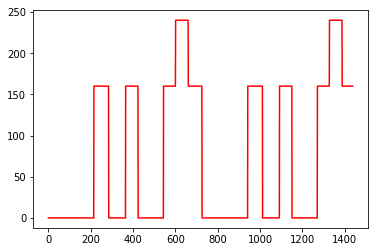

In [111]:
plt.plot(result['guest_lightfans'], 'r', label="Predicted")

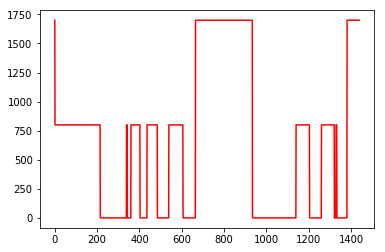

In [43]:
plt.plot(result['guest_ac'], 'r', label="Predicted")

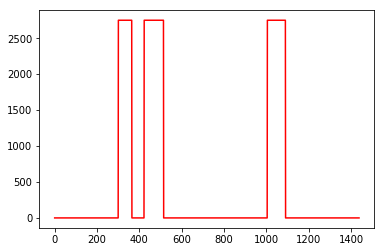

In [44]:
plt.plot(dataset['conferenceroom_AC'], 'r', label="Predicted")

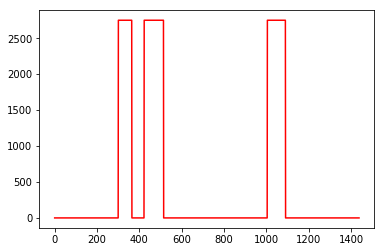

In [45]:
plt.plot(result['conferenceroom_AC'], 'r', label="Predicted")

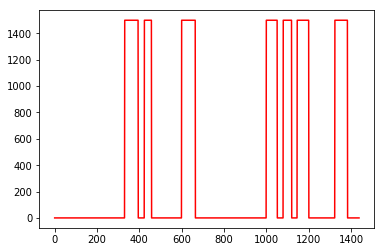

In [46]:
plt.plot(dataset['living_ac'], 'r', label="Predicted")

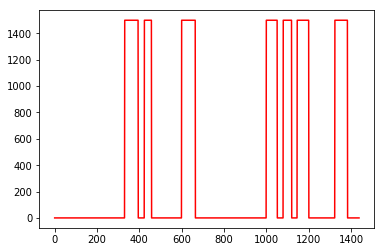

In [47]:
plt.plot(result['living_ac'], 'r', label="Predicted")

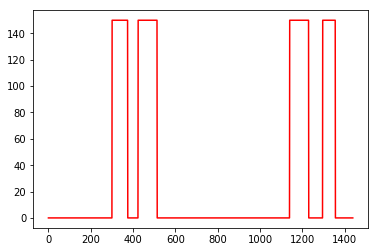

In [48]:
plt.plot(dataset['conf_lights'], 'r', label="Predicted")

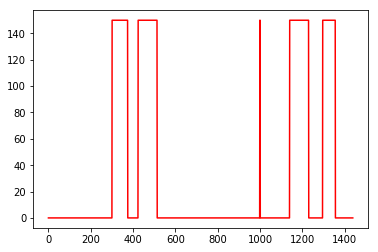

In [49]:
plt.plot(result['conf_lights'], 'r', label="Predicted")

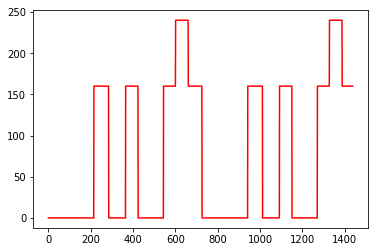

In [50]:
plt.plot(dataset['guest_lightfans'], 'r', label="Predicted")

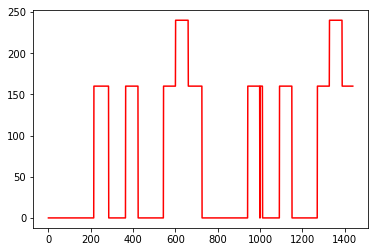

In [51]:
plt.plot(result['guest_lightfans'], 'r', label="Predicted")

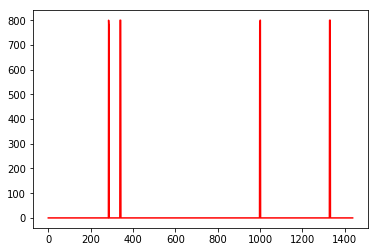

In [52]:
plt.plot(dataset['microwave'], 'r', label="Predicted")

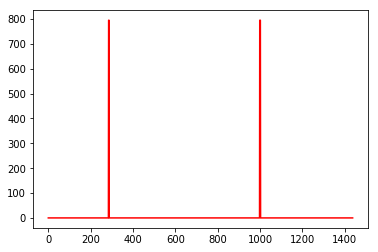

In [53]:
plt.plot(result['microwave'], 'r', label="Predicted")

In [112]:
from sklearn.metrics import mean_squared_error

In [114]:
rms_error = {}
for appliance in app_list:
    rms_error[appliance] = np.sqrt(mean_squared_error(testset[appliance], result[appliance]))

In [115]:
rms_error

{'refrigerator': 0.091318806343155451,
 'guest_ac': 23.725321840933415,
 'guest_lightfans': 0.0,
 'living_ac': 0.0,
 'conf_lights': 0.0,
 'conferenceroom_AC': 0.0}